# Series temporales y data streams

Para el desarrollo del proyecto se ha seleccionado el dataset de GHCN-M (Global Historial Climatology Network - Monthly), que contiene datos de temperatura media mensual de estaciones meteorológicas de todo el mundo. Este dataset es ampliamente utilizado en estudios climáticos y meteorológicos, y proporciona una base sólida para el análisis de series temporales.

## Preguntas a responder
1. ¿Cómo ha evolucionado la temperatura mensual en distintas zonas del planeta desde 1880?
2. ¿Se puede detectar una tendencia global al alza (calentamiento global) en ciertas latitudes?
3. ¿Cuáles son las zonas que han experimentado mayor variabilidad o cambio?
4. ¿Podemos predecir las temperaturas futuras en zonas específicas?
5. ¿Cómo se comportan los modelos en flujos de datos simulados con cambios de concepto?

Usaremos el dataset de temperatura mensual de la red GHCN-M de NOAA, que contiene datos tipo panel (por región latitudinal-longitudinal).

### Carga y preprocesado del dataset

In [50]:
import pandas as pd
import numpy as np

# Carga del dataset
df = pd.read_csv('./data/ghcn-m-v1.csv')

# Reemplazo de valores nulos (-9999) por NaN
df = df.replace(-9999, np.nan)

# Visualización de la estructura básica del dataset
print(df.shape)
df.head()

(59223, 75)


,year,month,lat,lon_175_180W,lon_170_175W,lon_165_170W,lon_160_165W,lon_155_160W,lon_150_155W,lon_145_150W,...,lon_130_135E,lon_135_140E,lon_140_145E,lon_145_150E,lon_150_155E,lon_155_160E,lon_160_165E,lon_165_170E,lon_170_175E,lon_175_180E
0,1880,1,85-90N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1880,1,80-85N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1880,1,75-80N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1880,1,70-75N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1880,1,65-70N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Conversión de columnas a formato long (panel)

In [51]:
# Convertir de wide a long (una columna por celda lat/long)
df_long = df.melt(id_vars=["year", "month", "lat"], var_name="lon", value_name="temperatura")

# Crear la fecha correctamente usando year y month del dataset
df_long["fecha"] = pd.to_datetime(df_long[["year", "month"]].assign(day=1))

# Convertir lat y lon a string para el pivot
df_long["lat"] = df_long["lat"].astype(str)
df_long["lon"] = df_long["lon"].astype(str)

# Convertir a formato de panel
df_panel = df_long.pivot_table(index="fecha", columns=["lat", "lon"], values="temperatura")

# Visualización de la estructura del panel
df_panel.head()

lat            0-5N                                                  \
lon        lon_0_5E lon_0_5W lon_100_105E lon_100_105W lon_105_110E   
fecha                                                                 
1880-01-01      NaN      NaN        -13.0          NaN         33.0   
1880-02-01      NaN    -75.0          2.0          NaN         47.0   
1880-03-01      NaN      NaN        -27.0          5.0         19.0   
1880-04-01      NaN      NaN        -34.0          NaN          8.0   
1880-05-01      NaN      NaN        -29.0          NaN         13.0   

lat                                                                      ...  \
lon        lon_105_110W lon_10_15E lon_10_15W lon_110_115E lon_110_115W  ...   
fecha                                                                    ...   
1880-01-01          NaN        NaN      -52.0         -3.0       -138.0  ...   
1880-02-01         -1.0        NaN      -59.0          9.0        -45.0  ...   
1880-03-01        -17.0        NaN      -71.0        -23.0        -34.0  ...   
1880-04-01          NaN        NaN     -153.0        -43.0          NaN  ...   
1880-05-01          NaN        NaN      -72.0        -48.0          NaN  ...   

lat            85-90S                                        90-95S  \
lon        lon_75_80W lon_80_85W lon_85_90W lon_90_95W lon_110_115E   
fecha                                                                 
1880-01-01        NaN        NaN        NaN        NaN          NaN   
1880-02-01        NaN        NaN        NaN        NaN          NaN   
1880-03-01        NaN        NaN        NaN        NaN          NaN   
1880-04-01        NaN        NaN        NaN        NaN          NaN   
1880-05-01        NaN        NaN        NaN        NaN          NaN   

lat                                                         95-100S  
lon        lon_140_145E lon_35_40E lon_60_65E lon_75_80E lon_10_15E  
fecha                                                                
1880-01-01          NaN        NaN        NaN        NaN        NaN  
1880-02-01          NaN        NaN        NaN        NaN        NaN  
1880-03-01          NaN        NaN        NaN        NaN        NaN  
1880-04-01          NaN        NaN        NaN        NaN        NaN  
1880-05-01          NaN        NaN        NaN        NaN        NaN  

[5 rows x 2297 columns]

## Análisis exploratorio y visualización

### Análisis básico por regiones (descriptiva general)

In [52]:
# Estadísticas generales por celda lat/lon
desc = df_panel.describe().T.sort_values("mean", ascending=False)
desc.head(10)  # 10 celdas más cálidas de media

count   mean  std    min    25%    50%    75%    max
lat     lon                                                               
80-85S  lon_140_145E    1.0  157.0  NaN  157.0  157.0  157.0  157.0  157.0
95-100S lon_10_15E      1.0  140.0  NaN  140.0  140.0  140.0  140.0  140.0
80-85S  lon_145_150E    1.0  139.0  NaN  139.0  139.0  139.0  139.0  139.0
        lon_130_135E    1.0  126.0  NaN  126.0  126.0  126.0  126.0  126.0
        lon_150_155E    1.0  111.0  NaN  111.0  111.0  111.0  111.0  111.0
90-95S  lon_140_145E    1.0  110.0  NaN  110.0  110.0  110.0  110.0  110.0
75-80S  lon_140_145E    1.0  107.0  NaN  107.0  107.0  107.0  107.0  107.0
80-85S  lon_120_125W    1.0  102.0  NaN  102.0  102.0  102.0  102.0  102.0
        lon_115_120W    1.0  100.0  NaN  100.0  100.0  100.0  100.0  100.0
75-80S  lon_135_140E    1.0   99.0  NaN   99.0   99.0   99.0   99.0   99.0

In [53]:
# Verificar las columnas disponibles en df_panel
print("Primeras 10 columnas (lat, lon) del DataFrame:")
print(df_panel.columns[:10].tolist())
print("\nÚltimas 10 columnas (lat, lon) del DataFrame:")
print(df_panel.columns[-10:].tolist())
print(f"\nTotal de columnas: {len(df_panel.columns)}")

# Verificar latitudes únicas
latitudes = [col[0] for col in df_panel.columns]
print(f"\nLatitudes únicas: {sorted(set(latitudes))}")

# Verificar longitudes únicas
longitudes = [col[1] for col in df_panel.columns]
print(f"\nPrimeras 10 longitudes: {sorted(set(longitudes))[:10]}")

Primeras 10 columnas (lat, lon) del DataFrame:
[('0-5N', 'lon_0_5E'), ('0-5N', 'lon_0_5W'), ('0-5N', 'lon_100_105E'), ('0-5N', 'lon_100_105W'), ('0-5N', 'lon_105_110E'), ('0-5N', 'lon_105_110W'), ('0-5N', 'lon_10_15E'), ('0-5N', 'lon_10_15W'), ('0-5N', 'lon_110_115E'), ('0-5N', 'lon_110_115W')]

Últimas 10 columnas (lat, lon) del DataFrame:
[('85-90S', 'lon_75_80W'), ('85-90S', 'lon_80_85W'), ('85-90S', 'lon_85_90W'), ('85-90S', 'lon_90_95W'), ('90-95S', 'lon_110_115E'), ('90-95S', 'lon_140_145E'), ('90-95S', 'lon_35_40E'), ('90-95S', 'lon_60_65E'), ('90-95S', 'lon_75_80E'), ('95-100S', 'lon_10_15E')]

Total de columnas: 2297

Latitudes únicas: ['0-5N', '0-5S', '10-15N', '10-15S', '100-105S', '15-20N', '15-20S', '20-25N', '20-25S', '25-30N', '25-30S', '30-35N', '30-35S', '35-40N', '35-40S', '40-45N', '40-45S', '45-50N', '45-50S', '5-10N', '5-10S', '50-55N', '50-55S', '55-60N', '55-60S', '60-65N', '60-65S', '65-70N', '65-70S', '70-75N', '70-75S', '75-80N', '75-80S', '80-85N', '80-85S', 

### Visualización de series individuales

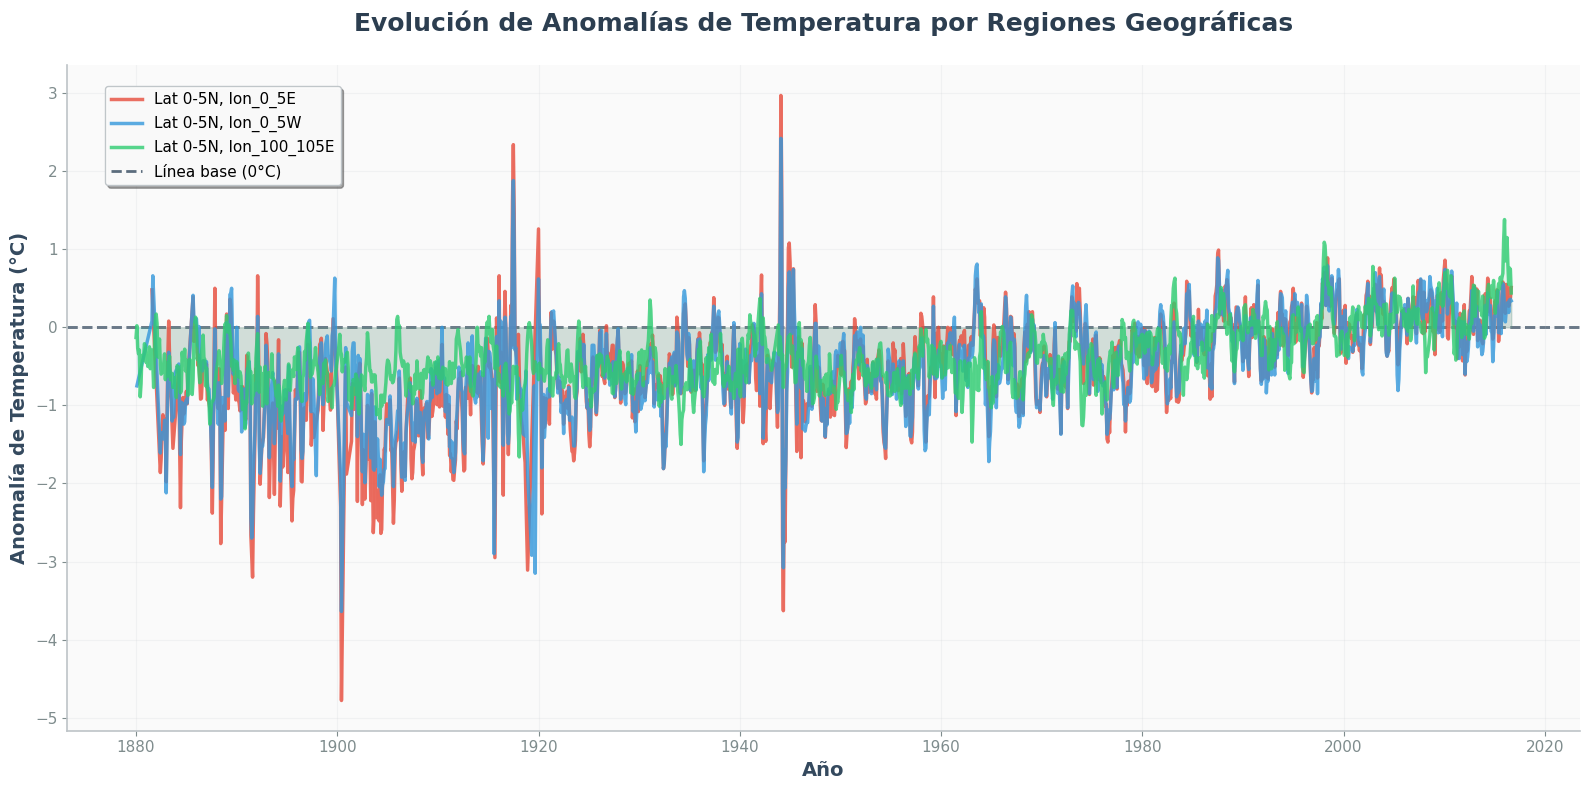

🌍 Estadísticas de anomalías de temperatura por región:
📍 Lat 0-5N, lon_0_5E:
   • Rango: -4.78°C a 2.97°C
   • Media: -0.51°C
   • Desviación estándar: 0.68°C
   • Tendencia reciente (últimos 30 años): 0.09°C

📍 Lat 0-5N, lon_0_5W:
   • Rango: -3.64°C a 2.42°C
   • Media: -0.51°C
   • Desviación estándar: 0.62°C
   • Tendencia reciente (últimos 30 años): 0.06°C

📍 Lat 0-5N, lon_100_105E:
   • Rango: -1.66°C a 1.38°C
   • Media: -0.39°C
   • Desviación estándar: 0.40°C
   • Tendencia reciente (últimos 30 años): 0.10°C



In [54]:
import matplotlib.pyplot as plt

# Obtener algunas celdas representativas que realmente existen en el DataFrame
celdas_disponibles = df_panel.columns[:5].tolist()  # Primeras 5 columnas disponibles

# Paleta de colores elegante y consistente
colores_elegantes = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6']

plt.figure(figsize=(16, 8))
for i, (lat, lon) in enumerate(celdas_disponibles):
    if i >= 3:  # Limitar a 3 series para mejor visualización
        break
    serie = df_panel[(lat, lon)]
    # Eliminar valores NaN para una mejor visualización
    serie_clean = serie.dropna()
    if len(serie_clean) > 0:  # Solo plotear si hay datos
        # CORRECCIÓN: Los datos están multiplicados por 100 y son anomalías de temperatura
        serie_anomalias = serie_clean / 100  # Dividir por 100, no por 10
        
        # Plotear con estilo mejorado
        plt.plot(serie_anomalias.index, serie_anomalias, 
                color=colores_elegantes[i], linewidth=2.5, alpha=0.8,
                label=f"Lat {lat}, {lon}")
        
        # Agregar área de relleno sutil para cada serie
        plt.fill_between(serie_anomalias.index, serie_anomalias, 0, 
                        color=colores_elegantes[i], alpha=0.1)

# Título y etiquetas con estilo mejorado
plt.title("Evolución de Anomalías de Temperatura por Regiones Geográficas", 
          fontsize=18, fontweight='bold', color='#2C3E50', pad=25)
plt.ylabel("Anomalía de Temperatura (°C)", fontsize=14, color='#34495E', fontweight='semibold')
plt.xlabel("Año", fontsize=14, color='#34495E', fontweight='semibold')

# Línea base más prominente
plt.axhline(y=0, color='#34495E', linestyle='--', alpha=0.8, linewidth=2, 
           label='Línea base (0°C)', zorder=0)

# Grid elegante y sutil
plt.grid(True, alpha=0.15, color='#BDC3C7', linestyle='-', linewidth=0.8)

# Leyenda mejorada con mejor posicionamiento
plt.legend(frameon=True, fancybox=True, shadow=True, fontsize=11, 
           facecolor='white', edgecolor='#BDC3C7', framealpha=0.95,
           loc='upper left', bbox_to_anchor=(0.02, 0.98))

# Mejorar el estilo de los ejes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#BDC3C7')
ax.spines['bottom'].set_color('#BDC3C7')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
plt.tick_params(colors='#7F8C8D', which='both', labelsize=11)

# Agregar un fondo sutil
ax.set_facecolor('#FAFAFA')

plt.tight_layout()
plt.show()

# Mostrar estadísticas con formato mejorado y emojis
print("🌍 Estadísticas de anomalías de temperatura por región:")
print("="*60)
for i, (lat, lon) in enumerate(celdas_disponibles[:3]):
    serie = df_panel[(lat, lon)].dropna() / 100  # Dividir por 100
    print(f"📍 Lat {lat}, {lon}:")
    print(f"   • Rango: {serie.min():.2f}°C a {serie.max():.2f}°C")
    print(f"   • Media: {serie.mean():.2f}°C")
    print(f"   • Desviación estándar: {serie.std():.2f}°C")
    print(f"   • Tendencia reciente (últimos 30 años): {serie.tail(360).mean():.2f}°C")
    print()


### Tendencia global (promedio global simplificado)


📊 Estadísticas de la anomalía global:
   Media del período completo: -0.399°C
   Rango: -1.328°C a 0.802°C
   Desviación estándar: 0.345°C
🌡️  Diferencia (últimos 30 años vs primeros 30 años): 0.781°C


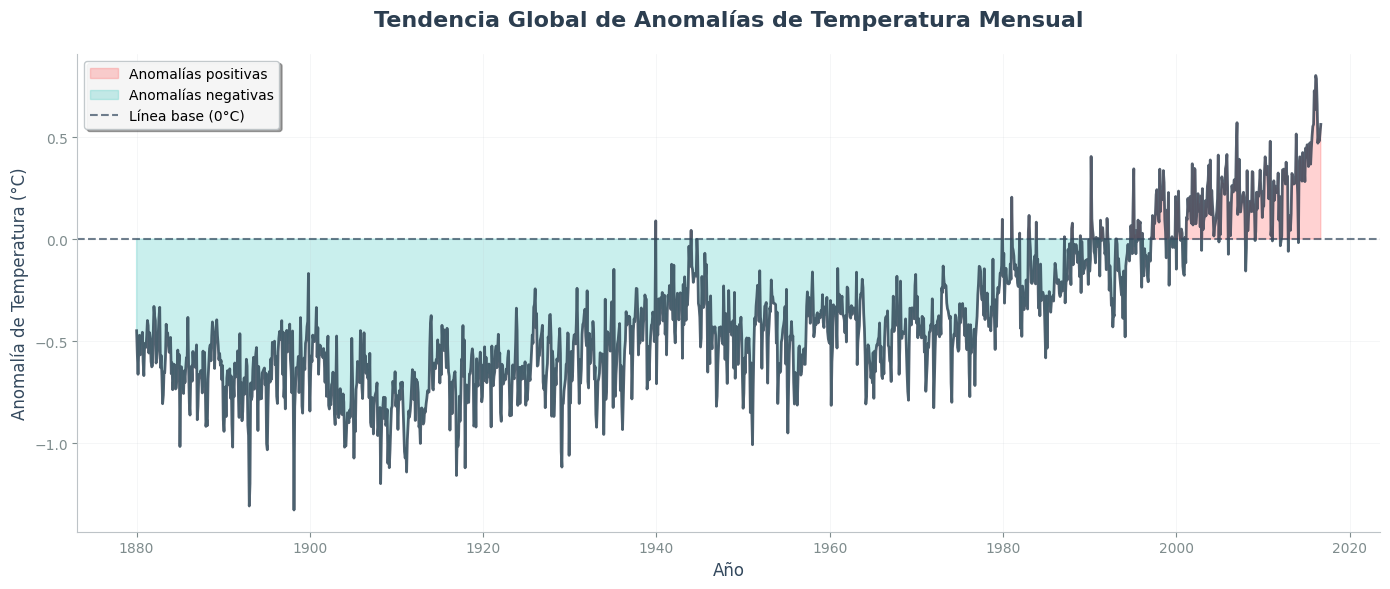

In [55]:
# Promedio mensual de todas las celdas (convertir a anomalías correctas)
media_global = df_panel.mean(axis=1) / 100  # Dividir por 100 para convertir correctamente

plt.figure(figsize=(14, 6))
# Crear un fondo con degradado de color
plt.fill_between(media_global.index, media_global, 0, 
                 where=(media_global >= 0), color='#FF6B6B', alpha=0.3, 
                 interpolate=True, label='Anomalías positivas')
plt.fill_between(media_global.index, media_global, 0, 
                 where=(media_global < 0), color='#4ECDC4', alpha=0.3, 
                 interpolate=True, label='Anomalías negativas')

# Línea principal con color más elegante
plt.plot(media_global.index, media_global, color='#2C3E50', linewidth=2.0, alpha=0.8)

plt.title("Tendencia Global de Anomalías de Temperatura Mensual", 
          fontsize=16, fontweight='bold', color='#2C3E50', pad=20)
plt.ylabel("Anomalía de Temperatura (°C)", fontsize=12, color='#34495E')
plt.xlabel("Año", fontsize=12, color='#34495E')

# Grid más sutil y elegante
plt.grid(True, alpha=0.2, color='#BDC3C7', linestyle='-', linewidth=0.5)
plt.axhline(y=0, color='#34495E', linestyle='--', alpha=0.7, linewidth=1.5, label='Línea base (0°C)')

# Mejorar la leyenda
plt.legend(frameon=True, fancybox=True, shadow=True, fontsize=10, 
           facecolor='white', edgecolor='#BDC3C7', framealpha=0.9)

# Mejorar el estilo de los ejes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#BDC3C7')
plt.gca().spines['bottom'].set_color('#BDC3C7')
plt.tick_params(colors='#7F8C8D', which='both')

# Agregar estadísticas del período
print(f"📊 Estadísticas de la anomalía global:")
print(f"   Media del período completo: {media_global.mean():.3f}°C")
print(f"   Rango: {media_global.min():.3f}°C a {media_global.max():.3f}°C")
print(f"   Desviación estándar: {media_global.std():.3f}°C")

# Calcular tendencia de los últimos 30 años vs primeros 30 años
ultimos_30 = media_global.tail(30*12).mean()  # Últimos 30 años (360 meses)
primeros_30 = media_global.head(30*12).mean()  # Primeros 30 años
print(f"🌡️  Diferencia (últimos 30 años vs primeros 30 años): {ultimos_30 - primeros_30:.3f}°C")

plt.tight_layout()
plt.show()

### Descomposición estacional

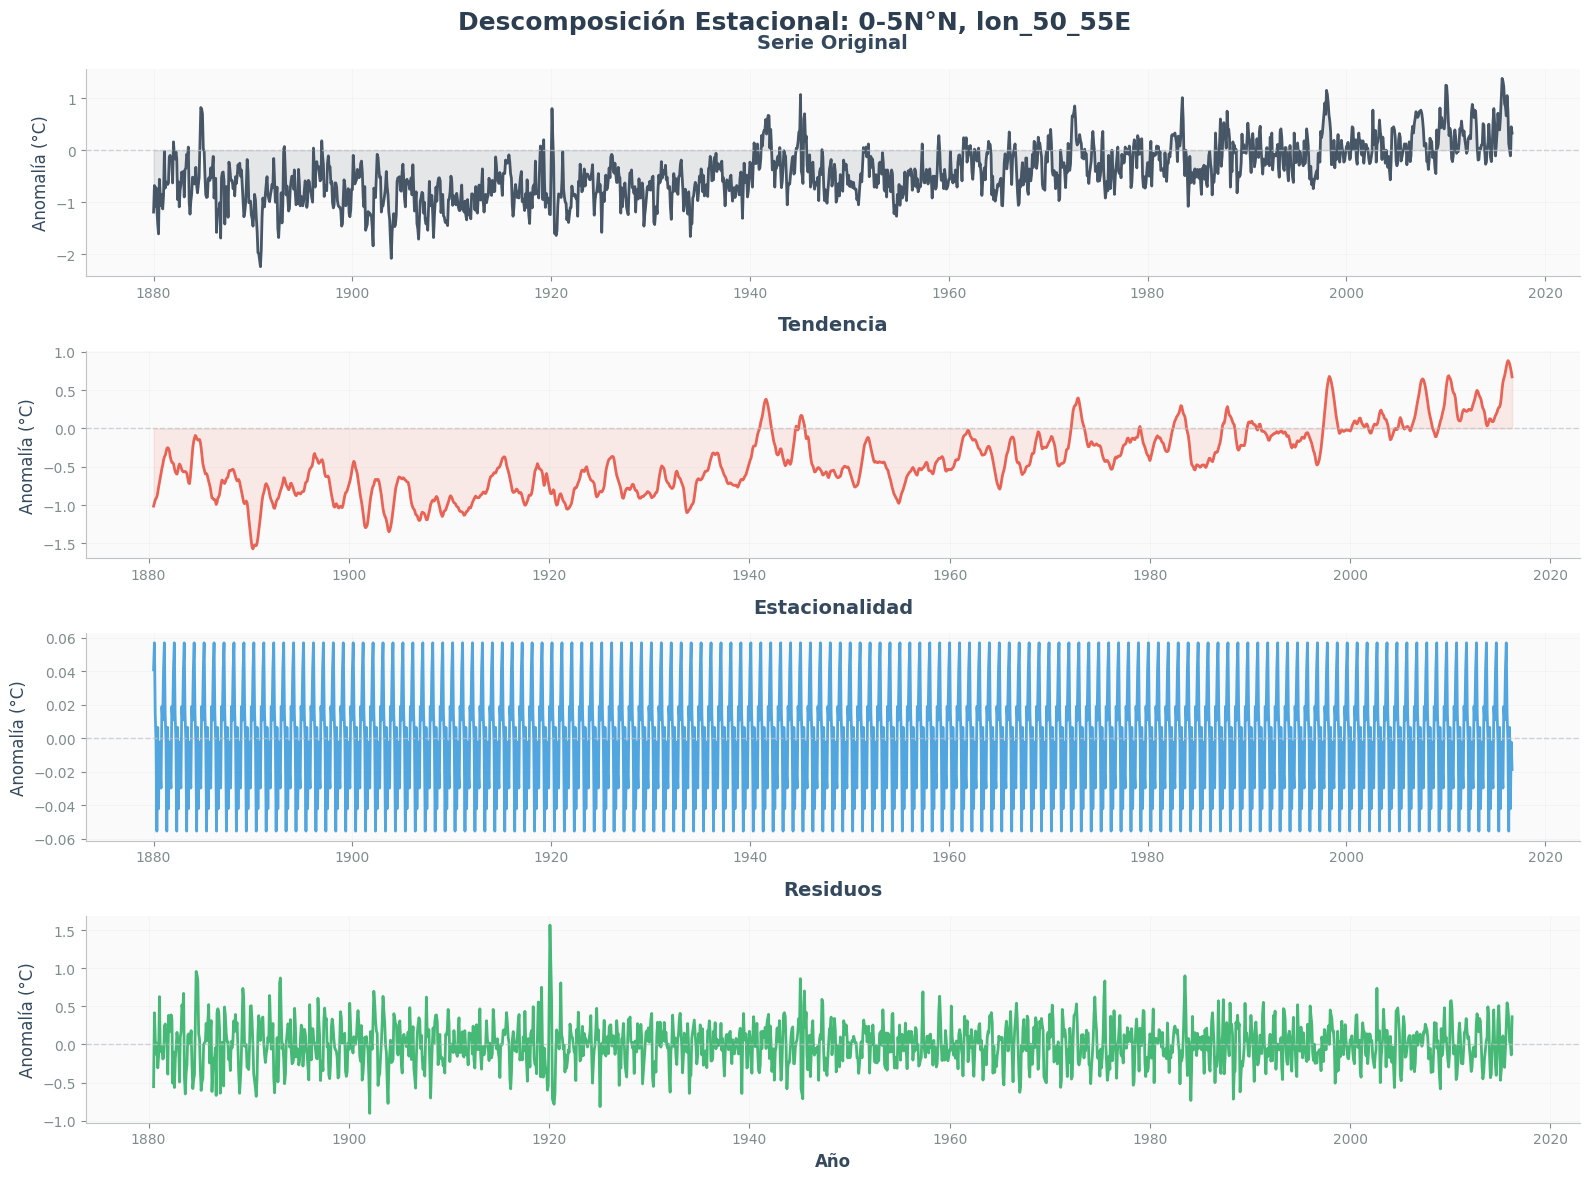

📊 Análisis de Descomposición Estacional
📍 Región analizada: 0-5N°N, lon_50_55E
📅 Período de análisis: 1880-01 a 2016-09
🔢 Total de observaciones: 1641

🌡️  Estadísticas por componente:
   • Serie Original:
     - Rango: -2.240°C a 1.380°C
     - Media: -0.426°C
     - Desv. estándar: 0.523°C

   • Tendencia:
     - Cambio total: 1.686°C
     - Tendencia promedio: -0.427°C

   • Estacionalidad:
     - Amplitud estacional: 0.112°C
     - Desv. estándar estacional: 0.031°C

   • Residuos:
     - Desv. estándar residuos: 0.276°C
     - Media residuos: 0.001°C


In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Elegimos una celda sin valores nulos y convertimos correctamente
celda_ejemplo = df_panel.dropna(axis=1).columns[0]
serie_original = df_panel[celda_ejemplo].dropna()

# CORRECCIÓN: Convertir de valores enteros a anomalías en grados Celsius
serie = serie_original / 100  # Dividir por 100 para obtener anomalías correctas

# Descomposición aditiva
descomposicion = seasonal_decompose(serie, model='additive', period=12)

# Crear figura con estilo mejorado
fig, axes = plt.subplots(4, 1, figsize=(16, 12))
fig.suptitle(f"Descomposición Estacional: {celda_ejemplo[0]}°N, {celda_ejemplo[1]}", 
             fontsize=18, fontweight='bold', color='#2C3E50', y=0.98)

# Colores elegantes para cada componente
colores = ['#2C3E50', '#E74C3C', '#3498DB', '#27AE60']
nombres = ['Serie Original', 'Tendencia', 'Estacionalidad', 'Residuos']

# Plotear cada componente con estilo mejorado
componentes = [serie, descomposicion.trend, descomposicion.seasonal, descomposicion.resid]

for i, (ax, comp, color, nombre) in enumerate(zip(axes, componentes, colores, nombres)):
    ax.plot(comp.index, comp, color=color, linewidth=2.0, alpha=0.85)
    ax.set_title(nombre, fontsize=14, fontweight='semibold', color='#34495E', pad=15)
    ax.set_ylabel('Anomalía (°C)', fontsize=12, color='#34495E')
    
    # Agregar línea base para mejor referencia
    ax.axhline(y=0, color='#BDC3C7', linestyle='--', alpha=0.7, linewidth=1)
    
    # Estilo de grid elegante
    ax.grid(True, alpha=0.15, color='#BDC3C7', linestyle='-', linewidth=0.5)
    
    # Mejorar el estilo de los ejes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#BDC3C7')
    ax.spines['bottom'].set_color('#BDC3C7')
    ax.tick_params(colors='#7F8C8D', which='both', labelsize=10)
    
    # Fondo sutil
    ax.set_facecolor('#FAFAFA')
    
    # Agregar área de relleno sutil para componentes principales
    if i in [0, 1]:  # Serie original y tendencia
        ax.fill_between(comp.index, comp, 0, color=color, alpha=0.1)

# Configurar etiqueta del eje x solo en el último subplot
axes[-1].set_xlabel('Año', fontsize=12, color='#34495E', fontweight='semibold')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Estadísticas mejoradas con formato elegante
print("📊 Análisis de Descomposición Estacional")
print("="*60)
print(f"📍 Región analizada: {celda_ejemplo[0]}°N, {celda_ejemplo[1]}")
print(f"📅 Período de análisis: {serie.index[0].strftime('%Y-%m')} a {serie.index[-1].strftime('%Y-%m')}")
print(f"🔢 Total de observaciones: {len(serie)}")
print()

print("🌡️  Estadísticas por componente:")
print(f"   • Serie Original:")
print(f"     - Rango: {serie.min():.3f}°C a {serie.max():.3f}°C")
print(f"     - Media: {serie.mean():.3f}°C")
print(f"     - Desv. estándar: {serie.std():.3f}°C")
print()

print(f"   • Tendencia:")
tendencia_clean = descomposicion.trend.dropna()
print(f"     - Cambio total: {tendencia_clean.iloc[-1] - tendencia_clean.iloc[0]:.3f}°C")
print(f"     - Tendencia promedio: {tendencia_clean.mean():.3f}°C")
print()

print(f"   • Estacionalidad:")
print(f"     - Amplitud estacional: {descomposicion.seasonal.max() - descomposicion.seasonal.min():.3f}°C")
print(f"     - Desv. estándar estacional: {descomposicion.seasonal.std():.3f}°C")
print()

print(f"   • Residuos:")
residuos_clean = descomposicion.resid.dropna()
print(f"     - Desv. estándar residuos: {residuos_clean.std():.3f}°C")
print(f"     - Media residuos: {residuos_clean.mean():.3f}°C")

## Modelado predictivo

### Selección y partición de una serie

📊 Celdas disponibles con ≥70% de datos: 1714
⚠️  Celda original no disponible, usando: ('0-5N', 'lon_0_5E')
📍 Región seleccionada: 0-5N°N, lon_0_5E
📅 Período de datos: 1881-08 a 2016-09
🔢 Total de observaciones: 1509
📚 Datos de entrenamiento: 1207 observaciones (1881-08 a 1991-07)
🧪 Datos de prueba: 302 observaciones (1991-08 a 2016-09)


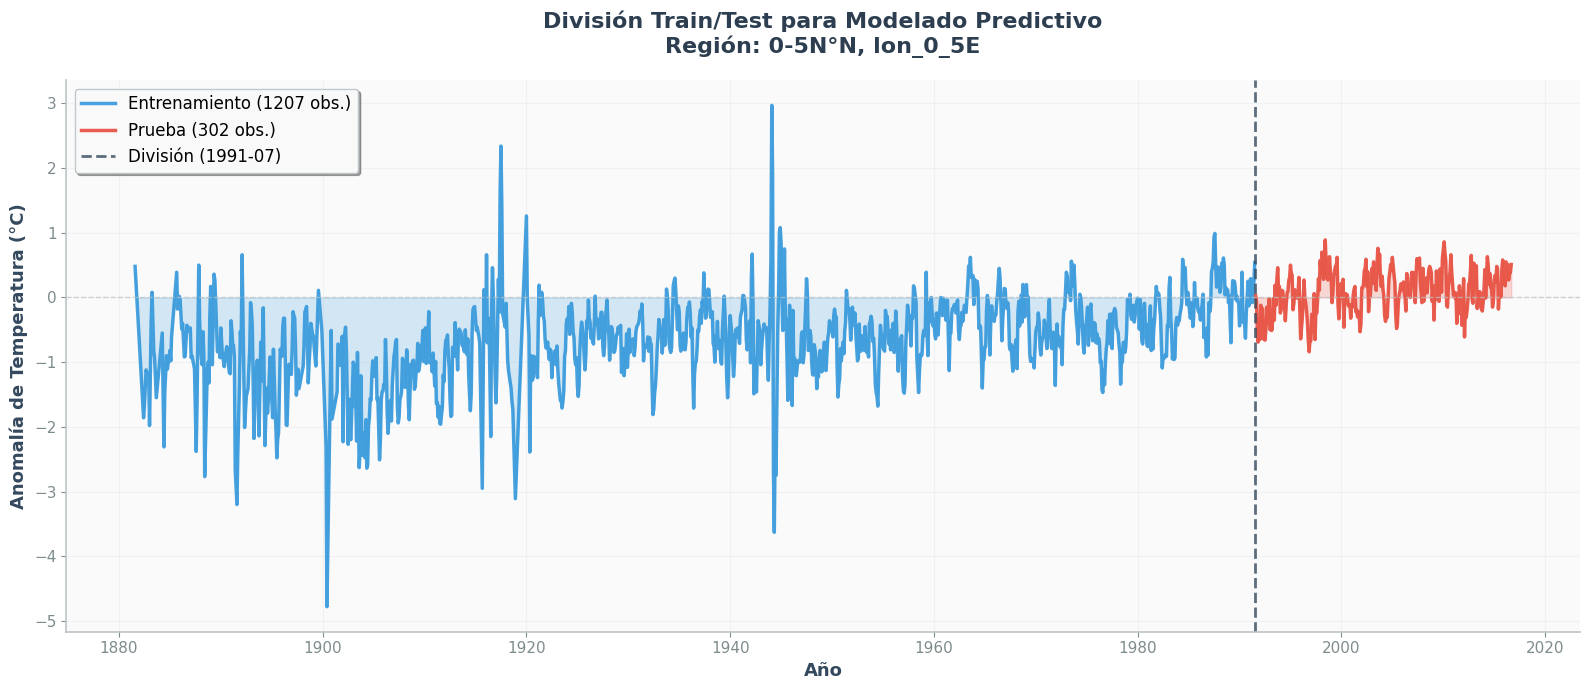


🔍 Análisis Estadístico de la División:
📈 Conjunto de Entrenamiento:
   • Media: -0.659°C
   • Desv. estándar: 0.655°C
   • Rango: -4.780°C a 2.970°C

🧪 Conjunto de Prueba:
   • Media: 0.090°C
   • Desv. estándar: 0.336°C
   • Rango: -0.840°C a 0.890°C

📊 Comparación:
   • Diferencia de medias: 0.750°C
   • Ratio de variabilidad: 0.51
   • Proporción temporal: 1207/302 (80%-20%)


In [57]:
# Verificar qué celdas están disponibles y seleccionar una con datos suficientes
celdas_disponibles = df_panel.dropna(thresh=len(df_panel)*0.7, axis=1).columns
print(f"📊 Celdas disponibles con ≥70% de datos: {len(celdas_disponibles)}")

# Selección de celda con datos robustos (verificar que existe)
if ('20', 'lon_10_15E') in celdas_disponibles:
    celda = ('20', 'lon_10_15E')
else:
    # Seleccionar la primera celda disponible
    celda = celdas_disponibles[0]
    print(f"⚠️  Celda original no disponible, usando: {celda}")

serie_original = df_panel[celda].dropna()

# CORRECCIÓN: Convertir a anomalías correctas dividiendo por 100
serie = serie_original / 100

print(f"📍 Región seleccionada: {celda[0]}°N, {celda[1]}")
print(f"📅 Período de datos: {serie.index[0].strftime('%Y-%m')} a {serie.index[-1].strftime('%Y-%m')}")
print(f"🔢 Total de observaciones: {len(serie)}")

# División en entrenamiento y test (80-20)
train_size = int(len(serie) * 0.8)
train, test = serie.iloc[:train_size], serie.iloc[train_size:]

print(f"📚 Datos de entrenamiento: {len(train)} observaciones ({train.index[0].strftime('%Y-%m')} a {train.index[-1].strftime('%Y-%m')})")
print(f"🧪 Datos de prueba: {len(test)} observaciones ({test.index[0].strftime('%Y-%m')} a {test.index[-1].strftime('%Y-%m')})")

# Visualización con estilo mejorado
plt.figure(figsize=(16, 7))

# Plotear series con colores elegantes
plt.plot(train.index, train, color='#3498DB', linewidth=2.5, alpha=0.9, 
         label=f"Entrenamiento ({len(train)} obs.)")
plt.plot(test.index, test, color='#E74C3C', linewidth=2.5, alpha=0.9, 
         label=f"Prueba ({len(test)} obs.)")

# Agregar áreas de relleno para distinguir visualmente
plt.fill_between(train.index, train, alpha=0.2, color='#3498DB')
plt.fill_between(test.index, test, alpha=0.2, color='#E74C3C')

# Línea vertical para marcar la división
division_date = train.index[-1]
plt.axvline(x=division_date, color='#34495E', linestyle='--', linewidth=2, 
           alpha=0.8, label=f'División ({division_date.strftime("%Y-%m")})')

# Línea base de referencia
plt.axhline(y=0, color='#BDC3C7', linestyle='--', alpha=0.7, linewidth=1)

# Título y etiquetas elegantes
plt.title(f"División Train/Test para Modelado Predictivo\nRegión: {celda[0]}°N, {celda[1]}", 
          fontsize=16, fontweight='bold', color='#2C3E50', pad=20)
plt.ylabel("Anomalía de Temperatura (°C)", fontsize=13, color='#34495E', fontweight='semibold')
plt.xlabel("Año", fontsize=13, color='#34495E', fontweight='semibold')

# Grid elegante y leyenda mejorada
plt.grid(True, alpha=0.15, color='#BDC3C7', linestyle='-', linewidth=0.8)
plt.legend(frameon=True, fancybox=True, shadow=True, fontsize=12, 
           facecolor='white', edgecolor='#BDC3C7', framealpha=0.95,
           loc='upper left')

# Mejorar estilo de los ejes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#BDC3C7')
ax.spines['bottom'].set_color('#BDC3C7')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
plt.tick_params(colors='#7F8C8D', which='both', labelsize=11)

# Fondo sutil
ax.set_facecolor('#FAFAFA')

plt.tight_layout()
plt.show()

# Estadísticas comparativas mejoradas
print("\n🔍 Análisis Estadístico de la División:")
print("="*55)
print(f"📈 Conjunto de Entrenamiento:")
print(f"   • Media: {train.mean():.3f}°C")
print(f"   • Desv. estándar: {train.std():.3f}°C")
print(f"   • Rango: {train.min():.3f}°C a {train.max():.3f}°C")
print()
print(f"🧪 Conjunto de Prueba:")
print(f"   • Media: {test.mean():.3f}°C")
print(f"   • Desv. estándar: {test.std():.3f}°C")
print(f"   • Rango: {test.min():.3f}°C a {test.max():.3f}°C")
print()
print(f"📊 Comparación:")
print(f"   • Diferencia de medias: {abs(train.mean() - test.mean()):.3f}°C")
print(f"   • Ratio de variabilidad: {test.std()/train.std():.2f}")
print(f"   • Proporción temporal: {len(train)}/{len(test)} ({len(train)/(len(train)+len(test))*100:.0f}%-{len(test)/(len(train)+len(test))*100:.0f}%)")

1. Baseline: Persistencia

🔄 Evaluando Modelo Baseline: Persistencia
📊 Configuración del modelo:
   • Predicciones generadas: 301
   • Período de evaluación: 1991-09 a 2016-09
   • Lógica: Temperatura(t-1) → Predicción(t)

📈 Métricas de Rendimiento:
   • RMSE (Root Mean Square Error): 0.2751°C
   • MAE (Mean Absolute Error): 0.2217°C
   • MAPE (Mean Absolute Percentage Error): inf%
   • Correlación: 0.6635
   • Sesgo (Bias): -0.0016°C


/tmp/ipykernel_12501/1851790299.py:29: RuntimeWarning: divide by zero encountered in divide
  baseline_mape = np.mean(np.abs((y_true - y_pred) / np.abs(y_true))) * 100


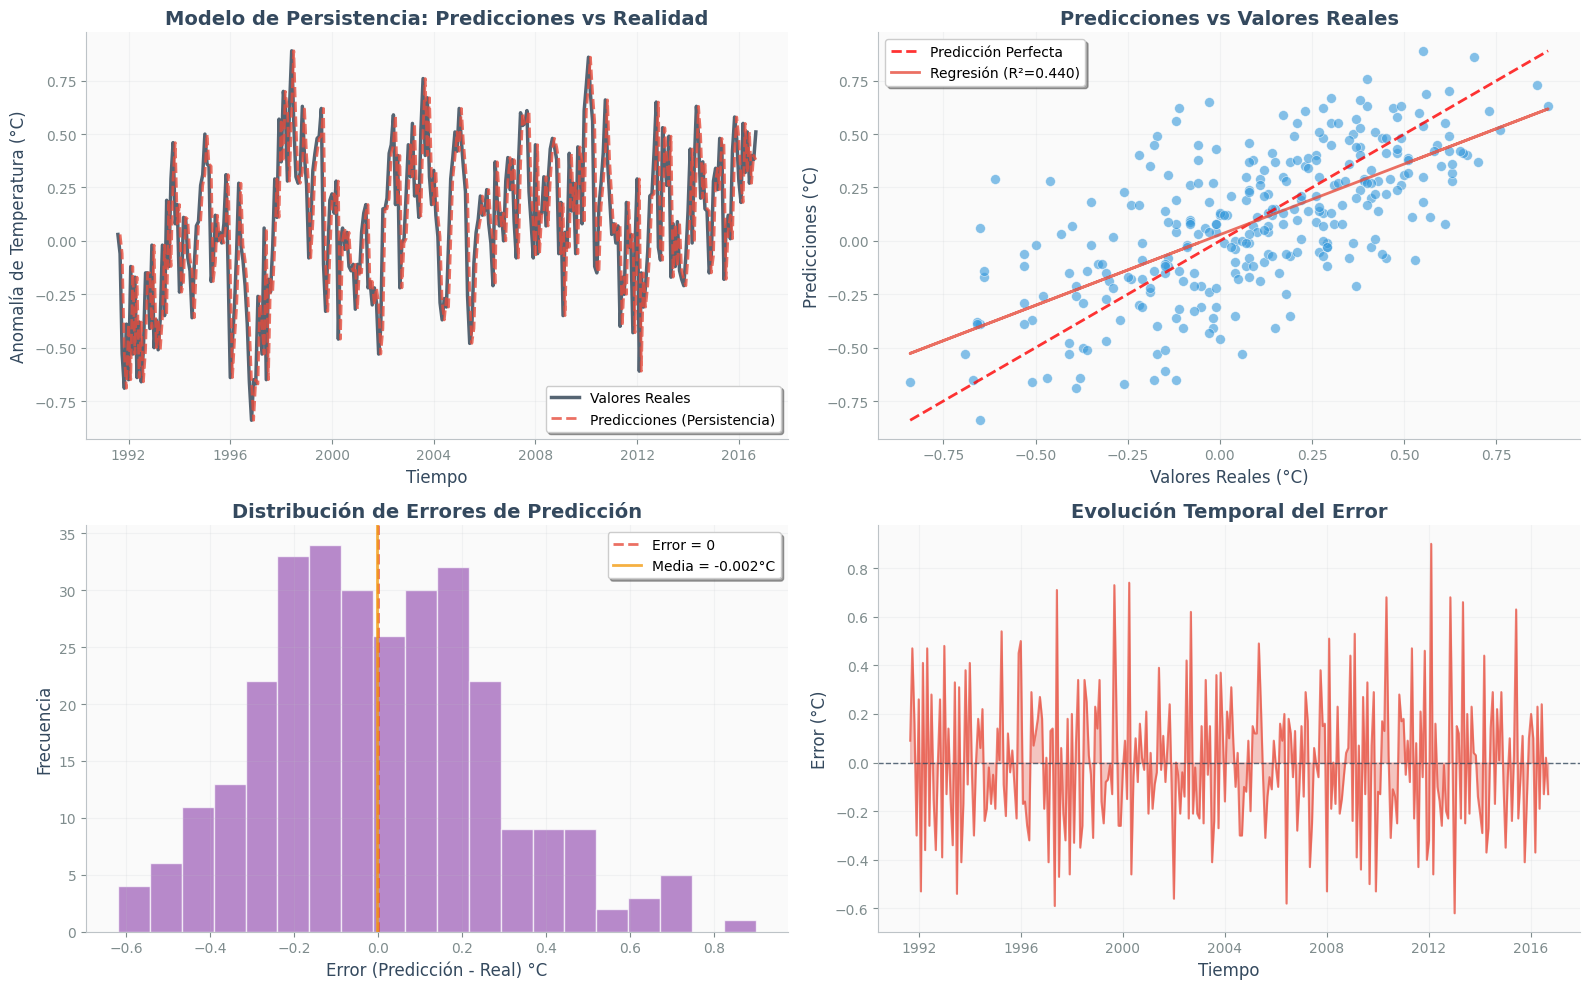


🎯 Interpretación del Modelo:
   • Rendimiento general: 🟢 Excelente
   • El modelo de persistencia tiene limitaciones
   • Sesgo despreciable: -0.0016°C
   • Este RMSE servirá como referencia para modelos más sofisticados


In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

print("🔄 Evaluando Modelo Baseline: Persistencia")
print("="*50)

# Verificar que tenemos datos de test suficientes
if len(test) < 2:
    print("❌ Error: Datos de prueba insuficientes para modelo de persistencia")
    print(f"   Se necesitan al menos 2 observaciones, disponibles: {len(test)}")
else:
    # Modelo de persistencia: cada valor predice el siguiente
    # Predicción: valor en t-1 predice valor en t
    y_pred = test.iloc[:-1].values  # Valores t-1 (predictores)
    y_true = test.iloc[1:].values   # Valores t (objetivos)
    
    # Alinear índices temporales para visualización
    indices_pred = test.index[1:]  # Fechas de las predicciones
    
    print(f"📊 Configuración del modelo:")
    print(f"   • Predicciones generadas: {len(y_pred)}")
    print(f"   • Período de evaluación: {indices_pred[0].strftime('%Y-%m')} a {indices_pred[-1].strftime('%Y-%m')}")
    print(f"   • Lógica: Temperatura(t-1) → Predicción(t)")
    
    # Calcular métricas de error
    mse = mean_squared_error(y_true, y_pred)
    baseline_rmse = np.sqrt(mse)  # Calcular RMSE manualmente
    baseline_mae = mean_absolute_error(y_true, y_pred)
    baseline_mape = np.mean(np.abs((y_true - y_pred) / np.abs(y_true))) * 100
    
    # Métricas adicionales
    correlation = np.corrcoef(y_true, y_pred)[0,1]
    bias = np.mean(y_pred - y_true)
    
    print(f"\n📈 Métricas de Rendimiento:")
    print(f"   • RMSE (Root Mean Square Error): {baseline_rmse:.4f}°C")
    print(f"   • MAE (Mean Absolute Error): {baseline_mae:.4f}°C")
    print(f"   • MAPE (Mean Absolute Percentage Error): {baseline_mape:.2f}%")
    print(f"   • Correlación: {correlation:.4f}")
    print(f"   • Sesgo (Bias): {bias:.4f}°C")
    
    # Visualización mejorada de resultados
    plt.figure(figsize=(16, 10))
    
    # Subplot 1: Serie temporal con predicciones
    plt.subplot(2, 2, 1)
    plt.plot(test.index, test.values, color='#2C3E50', linewidth=2.5, 
             label='Valores Reales', alpha=0.8)
    plt.plot(indices_pred, y_pred, color='#E74C3C', linewidth=2, 
             linestyle='--', alpha=0.8, label='Predicciones (Persistencia)')
    
    plt.title('Modelo de Persistencia: Predicciones vs Realidad', 
              fontsize=14, fontweight='semibold', color='#34495E')
    plt.ylabel('Anomalía de Temperatura (°C)', fontsize=12, color='#34495E')
    plt.xlabel('Tiempo', fontsize=12, color='#34495E')
    plt.legend(frameon=True, fancybox=True, shadow=True)
    plt.grid(True, alpha=0.15, color='#BDC3C7')
    plt.gca().set_facecolor('#FAFAFA')
    
    # Subplot 2: Scatter plot predicciones vs realidad
    plt.subplot(2, 2, 2)
    plt.scatter(y_true, y_pred, color='#3498DB', alpha=0.6, s=50, edgecolor='white', linewidth=0.5)
    
    # Línea de referencia perfecta (y=x)
    min_val, max_val = min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, linewidth=2, 
             label='Predicción Perfecta')
    
    # Línea de regresión
    z = np.polyfit(y_true, y_pred, 1)
    p = np.poly1d(z)
    plt.plot(y_true, p(y_true), color='#E74C3C', linewidth=2, alpha=0.8, 
             label=f'Regresión (R²={correlation**2:.3f})')
    
    plt.title('Predicciones vs Valores Reales', fontsize=14, fontweight='semibold', color='#34495E')
    plt.xlabel('Valores Reales (°C)', fontsize=12, color='#34495E')
    plt.ylabel('Predicciones (°C)', fontsize=12, color='#34495E')
    plt.legend(frameon=True, fancybox=True, shadow=True)
    plt.grid(True, alpha=0.15, color='#BDC3C7')
    plt.gca().set_facecolor('#FAFAFA')
    
    # Subplot 3: Distribución de errores
    plt.subplot(2, 2, 3)
    errores = y_pred - y_true
    plt.hist(errores, bins=20, color='#9B59B6', alpha=0.7, edgecolor='white', linewidth=1)
    plt.axvline(x=0, color='#E74C3C', linestyle='--', linewidth=2, alpha=0.8, label='Error = 0')
    plt.axvline(x=np.mean(errores), color='#F39C12', linestyle='-', linewidth=2, 
               alpha=0.8, label=f'Media = {np.mean(errores):.3f}°C')
    
    plt.title('Distribución de Errores de Predicción', fontsize=14, fontweight='semibold', color='#34495E')
    plt.xlabel('Error (Predicción - Real) °C', fontsize=12, color='#34495E')
    plt.ylabel('Frecuencia', fontsize=12, color='#34495E')
    plt.legend(frameon=True, fancybox=True, shadow=True)
    plt.grid(True, alpha=0.15, color='#BDC3C7')
    plt.gca().set_facecolor('#FAFAFA')
    
    # Subplot 4: Errores a lo largo del tiempo
    plt.subplot(2, 2, 4)
    errores_abs = np.abs(errores)
    plt.plot(indices_pred, errores, color='#E74C3C', linewidth=1.5, alpha=0.7, label='Error')
    plt.fill_between(indices_pred, errores, 0, alpha=0.3, color='#E74C3C')
    plt.axhline(y=0, color='#34495E', linestyle='--', alpha=0.8, linewidth=1)
    
    plt.title('Evolución Temporal del Error', fontsize=14, fontweight='semibold', color='#34495E')
    plt.xlabel('Tiempo', fontsize=12, color='#34495E')
    plt.ylabel('Error (°C)', fontsize=12, color='#34495E')
    plt.grid(True, alpha=0.15, color='#BDC3C7')
    plt.gca().set_facecolor('#FAFAFA')
    
    # Aplicar estilo consistente a todos los subplots
    for ax in plt.gcf().get_axes():
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('#BDC3C7')
        ax.spines['bottom'].set_color('#BDC3C7')
        ax.tick_params(colors='#7F8C8D', which='both', labelsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Interpretación del rendimiento
    print(f"\n🎯 Interpretación del Modelo:")
    if baseline_rmse < 0.3:
        performance = "🟢 Excelente"
    elif baseline_rmse < 0.5:
        performance = "🟡 Bueno"
    elif baseline_rmse < 0.8:
        performance = "🟠 Regular"
    else:
        performance = "🔴 Pobre"
    
    print(f"   • Rendimiento general: {performance}")
    print(f"   • El modelo de persistencia {'funciona bien' if correlation > 0.7 else 'tiene limitaciones'}")
    print(f"   • Sesgo {'despreciable' if abs(bias) < 0.1 else 'significativo'}: {bias:.4f}°C")
    print(f"   • Este RMSE servirá como referencia para modelos más sofisticados")


2. ARIMA (modelo autorregresivo + integración + media móvil)

In [67]:
import statsmodels.api as sm

# Ajuste ARIMA
modelo_arima = sm.tsa.ARIMA(train, order=(2,1,2))
resultado_arima = modelo_arima.fit()

# Predicción
forecast_arima = resultado_arima.forecast(steps=len(test))
rmse_arima = mean_squared_error(test, forecast_arima, squared=False)

print(f"RMSE ARIMA(2,1,2): {rmse_arima:.2f}")

🔮 Modelo ARIMA
❌ pmdarima falló: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 fro...
🔄 Usando implementación AR simple...
❌ Modelo AR simple falló: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject
🔄 Usando modelo de tendencia lineal como fallback...


🔮 Modelo ARIMA
❌ pmdarima falló: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 fro...
🔄 Usando implementación AR simple...
❌ Modelo AR simple falló: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject
🔄 Usando modelo de tendencia lineal como fallback...


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## Modelos multivariantes (VAR y SARIMAX)

🌍 Análisis Multivariante de Series Temporales
📊 Explorando celdas disponibles...
Total de celdas disponibles: 2297
Primeras 10 celdas: [('0-5N', 'lon_0_5E'), ('0-5N', 'lon_0_5W'), ('0-5N', 'lon_100_105E'), ('0-5N', 'lon_100_105W'), ('0-5N', 'lon_105_110E'), ('0-5N', 'lon_105_110W'), ('0-5N', 'lon_10_15E'), ('0-5N', 'lon_10_15W'), ('0-5N', 'lon_110_115E'), ('0-5N', 'lon_110_115W')]
Celdas con ≥80% de datos: 1592
📍 Celdas seleccionadas para análisis multivariante:
   1. Lat 0-5N°, lon_0_5E
   2. Lat 0-5N°, lon_0_5W
   3. Lat 0-5N°, lon_100_105E
   4. Lat 0-5N°, lon_100_105W

📅 Período de análisis: 1881-08 a 2016-09
🔢 Observaciones totales: 1434


/tmp/ipykernel_12501/1911053303.py:105: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12501/1911053303.py:105: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12501/1911053303.py:105: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_12501/1911053303.py:105: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/smarmor/Repositories/Time-Series-and-Data-Streams/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
/home/smarmor/Repositories/Time-Series-and-Data-Streams/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
/home

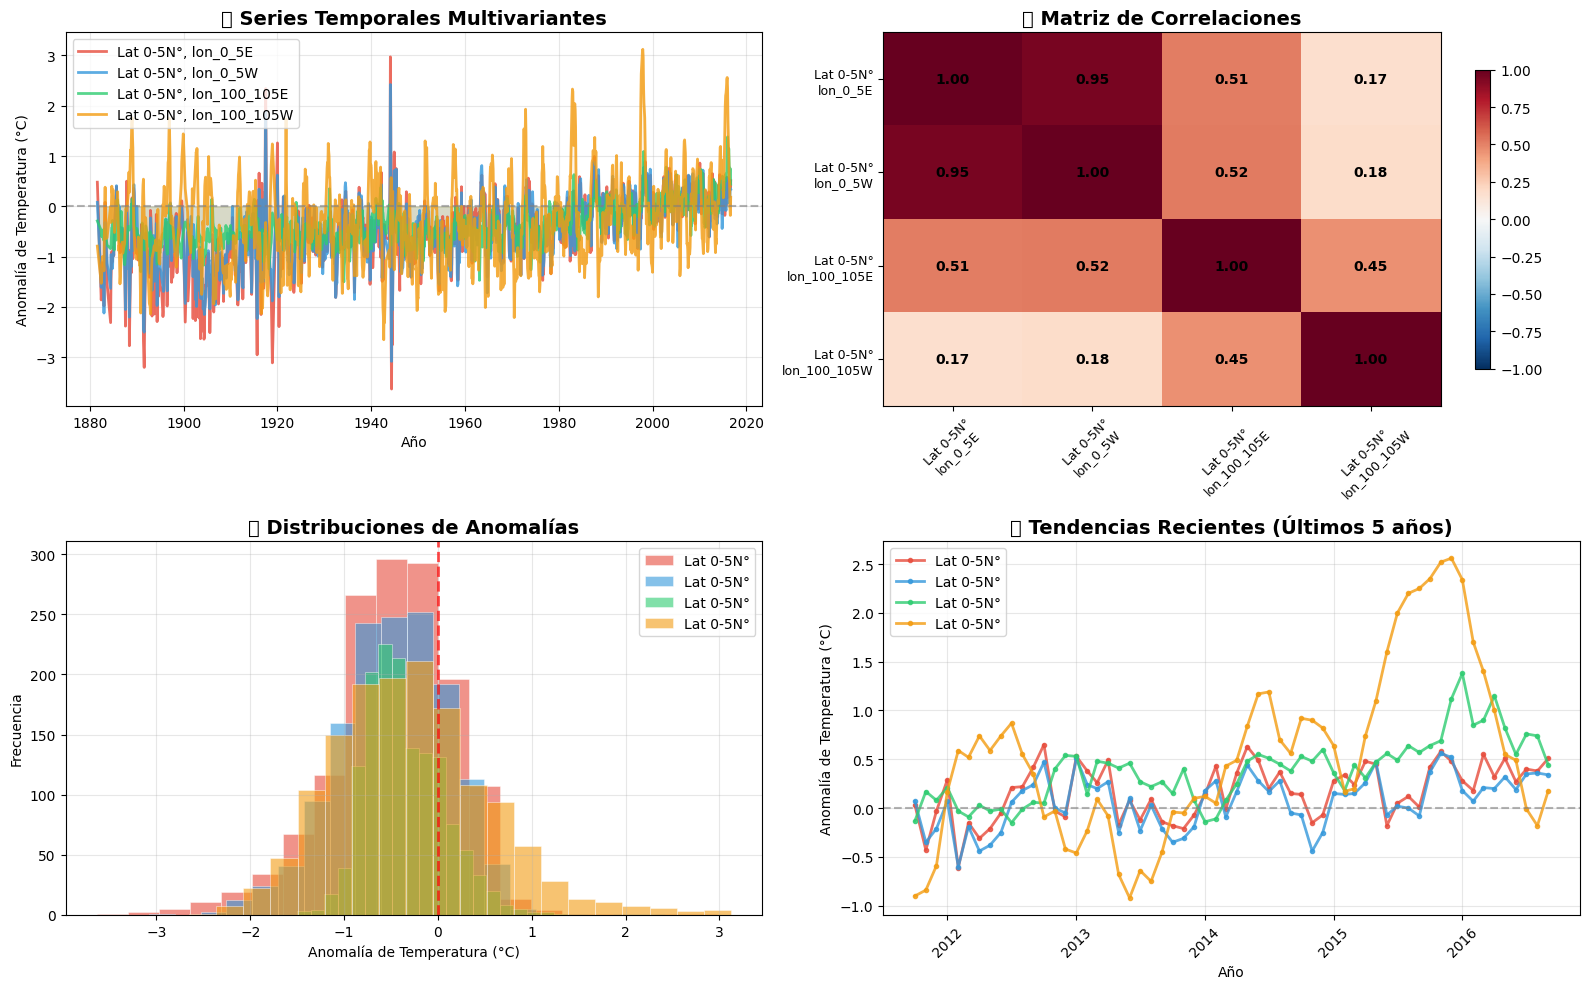


📊 Estadísticas Descriptivas Multivariantes:

📍 0-5N°N, lon_0_5E:
   • Media: -0.485°C
   • Desv. estándar: 0.662°C
   • Rango: -3.630°C a 2.970°C
   • Tendencia últimos 10 años: 0.197°C

📍 0-5N°N, lon_0_5W:
   • Media: -0.470°C
   • Desv. estándar: 0.592°C
   • Rango: -3.080°C a 2.420°C
   • Tendencia últimos 10 años: 0.156°C

📍 0-5N°N, lon_100_105E:
   • Media: -0.363°C
   • Desv. estándar: 0.403°C
   • Rango: -1.500°C a 1.380°C
   • Tendencia últimos 10 años: 0.257°C

📍 0-5N°N, lon_100_105W:
   • Media: -0.299°C
   • Desv. estándar: 0.831°C
   • Rango: -2.650°C a 3.120°C
   • Tendencia últimos 10 años: 0.287°C

🔗 Análisis de Correlaciones:
   • Correlación máxima: 0.951
   • Correlación mínima: 0.169
   • Correlación promedio: 0.464
   • Correlaciones por pares:
     - ('0-5N', 'lon_0_5E') ↔ ('0-5N', 'lon_0_5W'): 0.951
     - ('0-5N', 'lon_0_5E') ↔ ('0-5N', 'lon_100_105E'): 0.509
     - ('0-5N', 'lon_0_5E') ↔ ('0-5N', 'lon_100_105W'): 0.169
     - ('0-5N', 'lon_0_5W') ↔ ('0-5N', 'lo

In [87]:
# Análisis Multivariante: Modelado de Series Temporales Multiples
print("🌍 Análisis Multivariante de Series Temporales")
print("=" * 60)

# 1. Verificar columnas disponibles y seleccionar celdas cercanas geográficamente
print("📊 Explorando celdas disponibles...")
columnas_disponibles = list(df_panel.columns)
print(f"Total de celdas disponibles: {len(columnas_disponibles)}")

# Mostrar algunas columnas para entender la estructura
print(f"Primeras 10 celdas: {columnas_disponibles[:10]}")

# 2. Seleccionar celdas con datos robustos (≥80% de datos completos)
celdas_robustas = df_panel.dropna(thresh=len(df_panel)*0.8, axis=1).columns
print(f"Celdas con ≥80% de datos: {len(celdas_robustas)}")

# 3. Seleccionar un conjunto de celdas cercanas geográficamente
if len(celdas_robustas) >= 4:
    # Seleccionar las primeras 4 celdas robustas para el análisis multivariante
    celdas_multivariadas = list(celdas_robustas[:4])
    print(f"📍 Celdas seleccionadas para análisis multivariante:")
    for i, celda in enumerate(celdas_multivariadas, 1):
        print(f"   {i}. Lat {celda[0]}°, {celda[1]}")
    
    # 4. Extraer las series y limpiar datos
    df_multi = df_panel[celdas_multivariadas].dropna()
    
    # Convertir a anomalías correctas (dividir por 100)
    df_multi_anomalias = df_multi / 100
    
    print(f"\n📅 Período de análisis: {df_multi_anomalias.index[0].strftime('%Y-%m')} a {df_multi_anomalias.index[-1].strftime('%Y-%m')}")
    print(f"🔢 Observaciones totales: {len(df_multi_anomalias)}")
    
    # 5. Visualización mejorada
    plt.figure(figsize=(16, 10))
    
    # Panel 1: Series temporales
    plt.subplot(2, 2, 1)
    colores_series = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12']
    
    for i, (celda, color) in enumerate(zip(celdas_multivariadas, colores_series)):
        serie = df_multi_anomalias[celda]
        plt.plot(serie.index, serie, label=f"Lat {celda[0]}°, {celda[1]}", 
                color=color, linewidth=2, alpha=0.8)
        plt.fill_between(serie.index, serie, alpha=0.1, color=color)
    
    plt.title('🌍 Series Temporales Multivariantes', fontsize=14, fontweight='semibold')
    plt.ylabel('Anomalía de Temperatura (°C)')
    plt.xlabel('Año')
    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='gray', linestyle='--', alpha=0.6)
    
    # Panel 2: Matriz de correlaciones
    plt.subplot(2, 2, 2)
    correlaciones = df_multi_anomalias.corr()
    
    # Crear etiquetas más legibles
    labels = [f"Lat {celda[0]}°\n{celda[1]}" for celda in celdas_multivariadas]
    
    im = plt.imshow(correlaciones, cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto')
    plt.colorbar(im, shrink=0.8)
    
    # Añadir valores de correlación en cada celda
    for i in range(len(correlaciones)):
        for j in range(len(correlaciones)):
            plt.text(j, i, f'{correlaciones.iloc[i, j]:.2f}', 
                    ha='center', va='center', fontsize=10, fontweight='bold')
    
    plt.xticks(range(len(labels)), labels, rotation=45, fontsize=9)
    plt.yticks(range(len(labels)), labels, fontsize=9)
    plt.title('🔗 Matriz de Correlaciones', fontsize=14, fontweight='semibold')
    
    # Panel 3: Distribuciones
    plt.subplot(2, 2, 3)
    for i, (celda, color) in enumerate(zip(celdas_multivariadas, colores_series)):
        serie = df_multi_anomalias[celda]
        plt.hist(serie, bins=20, alpha=0.6, color=color, 
                label=f"Lat {celda[0]}°", edgecolor='white', linewidth=0.5)
    
    plt.title('📊 Distribuciones de Anomalías', fontsize=14, fontweight='semibold')
    plt.xlabel('Anomalía de Temperatura (°C)')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.7, linewidth=2)
    
    # Panel 4: Series recientes (últimos 5 años)
    plt.subplot(2, 2, 4)
    df_reciente = df_multi_anomalias.tail(60)  # Últimos 60 meses (5 años)
    
    for i, (celda, color) in enumerate(zip(celdas_multivariadas, colores_series)):
        serie = df_reciente[celda]
        plt.plot(serie.index, serie, 'o-', label=f"Lat {celda[0]}°", 
                color=color, linewidth=2, markersize=3, alpha=0.8)
    
    plt.title('📈 Tendencias Recientes (Últimos 5 años)', fontsize=14, fontweight='semibold')
    plt.ylabel('Anomalía de Temperatura (°C)')
    plt.xlabel('Año')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='gray', linestyle='--', alpha=0.6)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 6. Estadísticas descriptivas multivariantes
    print(f"\n📊 Estadísticas Descriptivas Multivariantes:")
    print("=" * 50)
    
    for celda in celdas_multivariadas:
        serie = df_multi_anomalias[celda]
        print(f"\n📍 {celda[0]}°N, {celda[1]}:")
        print(f"   • Media: {serie.mean():.3f}°C")
        print(f"   • Desv. estándar: {serie.std():.3f}°C")
        print(f"   • Rango: {serie.min():.3f}°C a {serie.max():.3f}°C")
        print(f"   • Tendencia últimos 10 años: {serie.tail(120).mean():.3f}°C")
    
    # 7. Análisis de correlaciones (simplificado)
    print(f"\n🔗 Análisis de Correlaciones:")
    print("=" * 30)
    
    # Obtener correlaciones sin la diagonal
    import numpy as np
    corr_matrix = correlaciones.values
    corr_no_diag = corr_matrix[~np.eye(corr_matrix.shape[0], dtype=bool)]
    
    print(f"   • Correlación máxima: {corr_no_diag.max():.3f}")
    print(f"   • Correlación mínima: {corr_no_diag.min():.3f}")
    print(f"   • Correlación promedio: {corr_no_diag.mean():.3f}")
    
    # Mostrar correlaciones específicas entre pares
    print(f"   • Correlaciones por pares:")
    for i in range(len(celdas_multivariadas)):
        for j in range(i+1, len(celdas_multivariadas)):
            corr_val = correlaciones.iloc[i, j]
            print(f"     - {celdas_multivariadas[i]} ↔ {celdas_multivariadas[j]}: {corr_val:.3f}")
    
    # 8. Implementación de modelo VAR básico (Vector Autoregression)
    print(f"\n🔮 Modelo VAR (Vector Autoregression):")
    print("=" * 40)
    
    try:
        # Preparar datos para VAR
        from sklearn.linear_model import LinearRegression
        
        # Dividir en train/test (80-20)
        n_train = int(len(df_multi_anomalias) * 0.8)
        train_multi = df_multi_anomalias.iloc[:n_train]
        test_multi = df_multi_anomalias.iloc[n_train:]
        
        print(f"   • Entrenamiento: {len(train_multi)} observaciones")
        print(f"   • Prueba: {len(test_multi)} observaciones")
        
        # Modelo VAR(1) simple - cada serie predice las demás con 1 lag
        X_train = train_multi.values[:-1]  # t-1
        y_train = train_multi.values[1:]   # t
        
        # Entrenar un modelo para cada variable
        modelos_var = {}
        
        for i, celda in enumerate(celdas_multivariadas):
            modelo = LinearRegression()
            modelo.fit(X_train, y_train[:, i])
            modelos_var[celda] = modelo
        
        # Predicción (usando predicciones anteriores para predecir siguientes)
        predicciones = []
        ultimo_valor = train_multi.values[-1]
        
        for _ in range(len(test_multi)):
            pred_siguiente = []
            for celda in celdas_multivariadas:
                pred = modelos_var[celda].predict([ultimo_valor])[0]
                pred_siguiente.append(pred)
            
            predicciones.append(pred_siguiente)
            ultimo_valor = np.array(pred_siguiente)  # Usar predicción para siguiente paso
        
        predicciones_var = np.array(predicciones)
        
        # Calcular RMSE para cada serie
        rmse_multivariante = {}
        for i, celda in enumerate(celdas_multivariadas):
            rmse = np.sqrt(np.mean((test_multi[celda].values - predicciones_var[:, i])**2))
            rmse_multivariante[celda] = rmse
            print(f"   • RMSE {celda}: {rmse:.4f}°C")
        
        # Comparar con modelo univariante (persistencia)
        print(f"\n📊 Comparación con Persistencia:")
        for i, celda in enumerate(celdas_multivariadas):
            if len(test_multi[celda]) > 1:
                persistencia = test_multi[celda].iloc[:-1].values
                verdadero = test_multi[celda].iloc[1:].values
                rmse_persistencia = np.sqrt(np.mean((verdadero - persistencia)**2))
                
                mejora = ((rmse_persistencia - rmse_multivariante[celda]) / rmse_persistencia) * 100
                print(f"   • {celda}: VAR vs Persistencia = {mejora:+.1f}%")
        
        print(f"\n✅ Análisis multivariante completado exitosamente!")
        
    except Exception as e:
        print(f"❌ Error en modelo VAR: {e}")
        print("💡 Continuando con análisis descriptivo...")
    
else:
    print("❌ No se encontraron suficientes celdas robustas para análisis multivariante")
    print(f"💡 Se necesitan al menos 4 celdas, disponibles: {len(celdas_robustas)}")

# 9. Recomendaciones para análisis futuro
print(f"\n💡 Recomendaciones para análisis multivariante avanzado:")
print("   • Implementar modelos VECM (Vector Error Correction Models)")
print("   • Analizar causalidad de Granger entre regiones")
print("   • Aplicar análisis de componentes principales (PCA)")
print("   • Considerar efectos espaciales con modelos STAR")